In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2
float64		column 2	2
float64		column 3	2
float64		column 4	1
float64		column 5	2
float64		column 6	2
float64		column 7	1
float64		column 8	2
float64		column 9	4


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,212.000000,212.000000,212.000000,213.000000,212.000000,212.000000,213.000000,212.000000,210.000000
mean,1.518360,13.412358,2.709858,1.443146,72.659104,0.498443,8.953897,0.173726,0.055286
std,0.003037,0.818576,1.425239,0.499779,0.771829,0.654856,1.425797,0.498440,0.095242
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516528,12.922500,2.197500,1.190000,72.280000,0.120000,8.240000,0.000000,0.000000
50%,1.517680,13.305000,3.480000,1.360000,72.800000,0.560000,8.600000,0.000000,0.000000
75%,1.519153,13.840000,3.602500,1.630000,73.092500,0.610000,9.150000,0.000000,0.097500
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

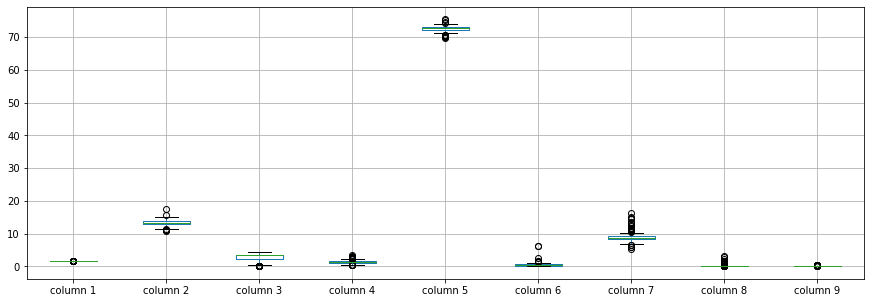

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518360
column 2    13.412358
column 3     2.709858
column 4     1.443146
column 5    72.659104
column 6     0.498443
column 7     8.953897
column 8     0.173726
column 9     0.055286
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.203677,-0.110190,-0.404042,-0.540754,-0.290074,0.812229,0.006854,0.103191
column 2,-0.203677,1.000000,-0.320978,0.148593,-0.054958,-0.265888,-0.275669,0.321439,-0.225180
column 3,-0.110190,-0.320978,1.000000,-0.460312,-0.232971,0.108430,-0.451196,-0.493849,0.115114
column 4,-0.404042,0.148593,-0.460312,1.000000,0.004531,0.325044,-0.254088,0.493125,-0.053101
column 5,-0.540754,-0.054958,-0.232971,0.004531,1.000000,-0.187389,-0.229926,-0.086577,-0.079548
column 6,-0.290074,-0.265888,0.108430,0.325044,-0.187389,1.000000,-0.321046,-0.040722,0.023882
column 7,0.812229,-0.275669,-0.451196,-0.254088,-0.229926,-0.321046,1.000000,-0.108675,0.085405
column 8,0.006854,0.321439,-0.493849,0.493125,-0.086577,-0.040722,-0.108675,1.000000,-0.052897
column 9,0.103191,-0.225180,0.115114,-0.053101,-0.079548,0.023882,0.085405,-0.052897,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+67,9+67+67,9+67+67+67,9+67+67+67+67,9+67+67+67+67+67,9+67+67+67+67,9+67+67+67,9+67+67,9+67,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 101.57699115459735
Epoch: 1 , loss: 101.57691896878757
Epoch: 2 , loss: 101.51934462327223
Epoch: 3 , loss: 101.54787151630109
Epoch: 4 , loss: 101.45604177621695
Epoch: 5 , loss: 101.49864666278546
Epoch: 6 , loss: 101.46081895094652
Epoch: 7 , loss: 101.41588709904597
Epoch: 8 , loss: 101.51122107872597
Epoch: 9 , loss: 101.47411229060246
Epoch: 10 , loss: 101.41423034667969
Epoch: 11 , loss: 101.37382155198317
Epoch: 12 , loss: 101.4211684006911
Epoch: 13 , loss: 101.33854323167067
Epoch: 14 , loss: 101.27520165076622
Epoch: 15 , loss: 101.26001211313101
Epoch: 16 , loss: 101.14817399245042
Epoch: 17 , loss: 100.9153571495643
Epoch: 18 , loss: 100.51979358379657
Epoch: 19 , loss: 99.47385817307692
Epoch: 20 , loss: 98.75637993445763
Epoch: 21 , loss: 97.90780815711388
Epoch: 22 , loss: 97.4863780095027
Epoch: 23 , loss: 96.52860260009766
Epoch: 24 , loss: 95.18872305063101
Epoch: 25 , loss: 94.410582

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(74.90147828076333, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.06868947792020683

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_NG_1(imp).xlsx", index=False, header=False)